# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
from collections import Counter as c 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import pickle 
from sklearn.linear_model import LinearRegression 

# Loading Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_bab32e1cba3f4a85a428629668469b8c = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_bab32e1cba3f4a85a428629668469b8c = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_bab32e1cba3f4a85a428629668469b8c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Vm0QtM0P-ALOqHd89IRci9h6X-D4nlCmpGRbYCM-NuYc',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_bab32e1cba3f4a85a428629668469b8c)

body = client_bab32e1cba3f4a85a428629668469b8c.get_object(Bucket='predictingcompressivestrengthofco-donotdelete-pr-iivxmwfofmkwjj',Key='concrete.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


# Renaming columns

In [5]:
data.columns = [col[:col.find("(")].strip() for col in data.columns] 
data.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


# Info of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Seeing Target, Nominal and Numerical Columns Count

In [8]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64')], dtype=object), array([1, 8]))

In [9]:
data.dtypes[data.dtypes!='O'].index.values

array(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
       'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'], dtype=object)

# Null Values

In [10]:
data.isnull().any()

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age                              False
Concrete compressive strength    False
dtype: bool

In [11]:
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

<AxesSubplot:>

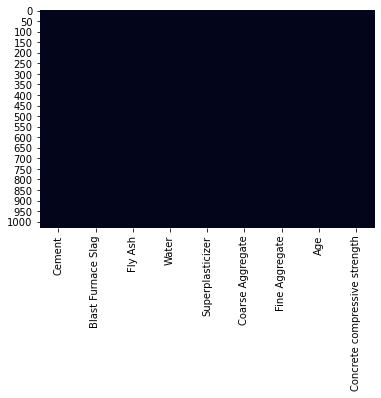

In [12]:
sns.heatmap(data.isnull(),cbar=False)

# Performing Log transformation to over data

In [13]:
for column in data.columns[:8]:
    data[column]+=1
    data[column] = np.log(data[column])

# Data visualization

Detecting the outliers using boxplot

<AxesSubplot:>

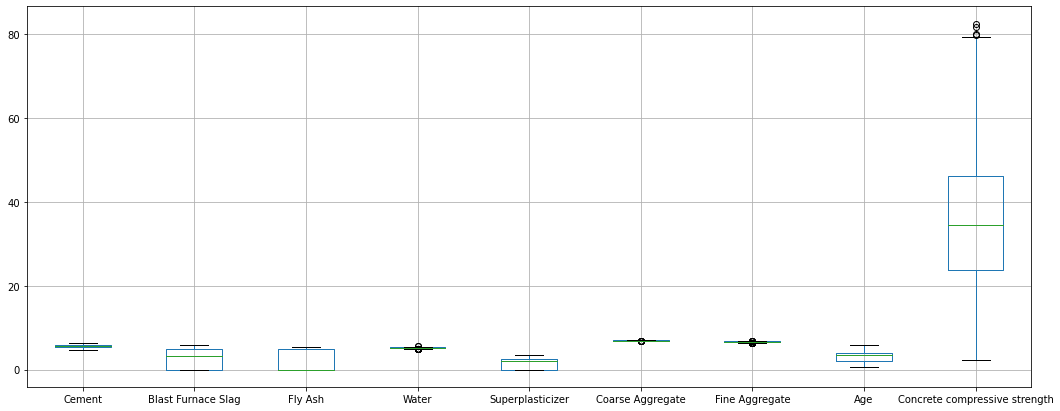

In [14]:
data.boxplot(figsize=(18,7))

In [15]:
def outliers():
    for i in data.columns:
        print("\033[1m" + i + "\033[0m")
        Q1 = data[i].quantile(q=0.25) 
        Q3 = data[i].quantile(q=0.75) 
        print('1st Quartile (Q1) is: ', Q1)
        print('3st Quartile (Q3) is: ', Q3)
        IQR = Q3 - Q1 
        print(IQR)
        UL = Q3 + (1.5 * IQR) 
        
        print("upper limit : ",UL)
        LL = Q1 - (1.5 * IQR) 
        print("lower limit : ",LL)
        print("Outlier present above UL",data[i][data[i]>UL].count())
        print("Outlier present above LL",data[i][data[i]<LL].count())
        print('---'*40)
outliers() 

Cement
1st Quartile (Q1) is:  5.26462568244329
3st Quartile (Q3) is:  5.860786223465865
0.5961605410225754
upper limit :  6.755027034999729
lower limit :  4.370384870909427
Outlier present above UL 0
Outlier present above LL 0
------------------------------------------------------------------------------------------------------------------------
Blast Furnace Slag
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  4.969465836003737
4.969465836003737
upper limit :  12.423664590009341
lower limit :  -7.454198754005605
Outlier present above UL 0
Outlier present above LL 0
------------------------------------------------------------------------------------------------------------------------
Fly Ash
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  4.78164132910387
4.78164132910387
upper limit :  11.954103322759675
lower limit :  -7.172461993655805
Outlier present above UL 0
Outlier present above LL 0
------------------------------------------------------------------------------------------

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

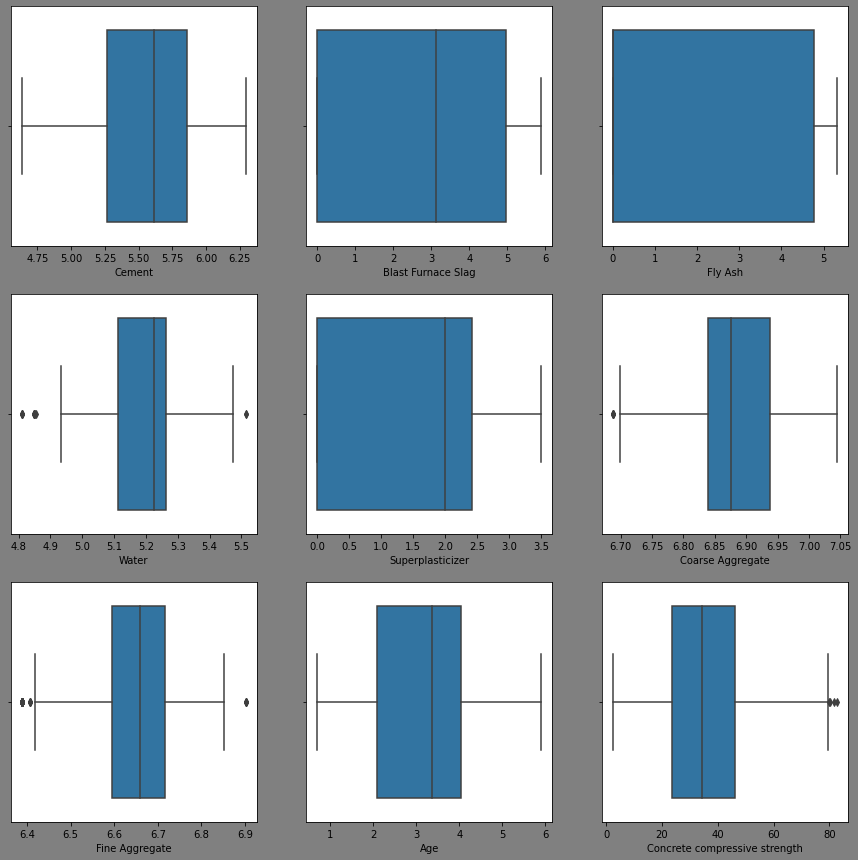

In [16]:
plt.figure(figsize=(15,15),facecolor='gray') 
plotnumber = 1

for column in data.columns:
    a = plt.subplot(3,3,plotnumber) 
    sns.boxplot((data[column])) 
    plt.xlabel(column,fontsize=10) 
    plotnumber=plotnumber+1
plt.show()

# Scatterplot with the Target Column

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

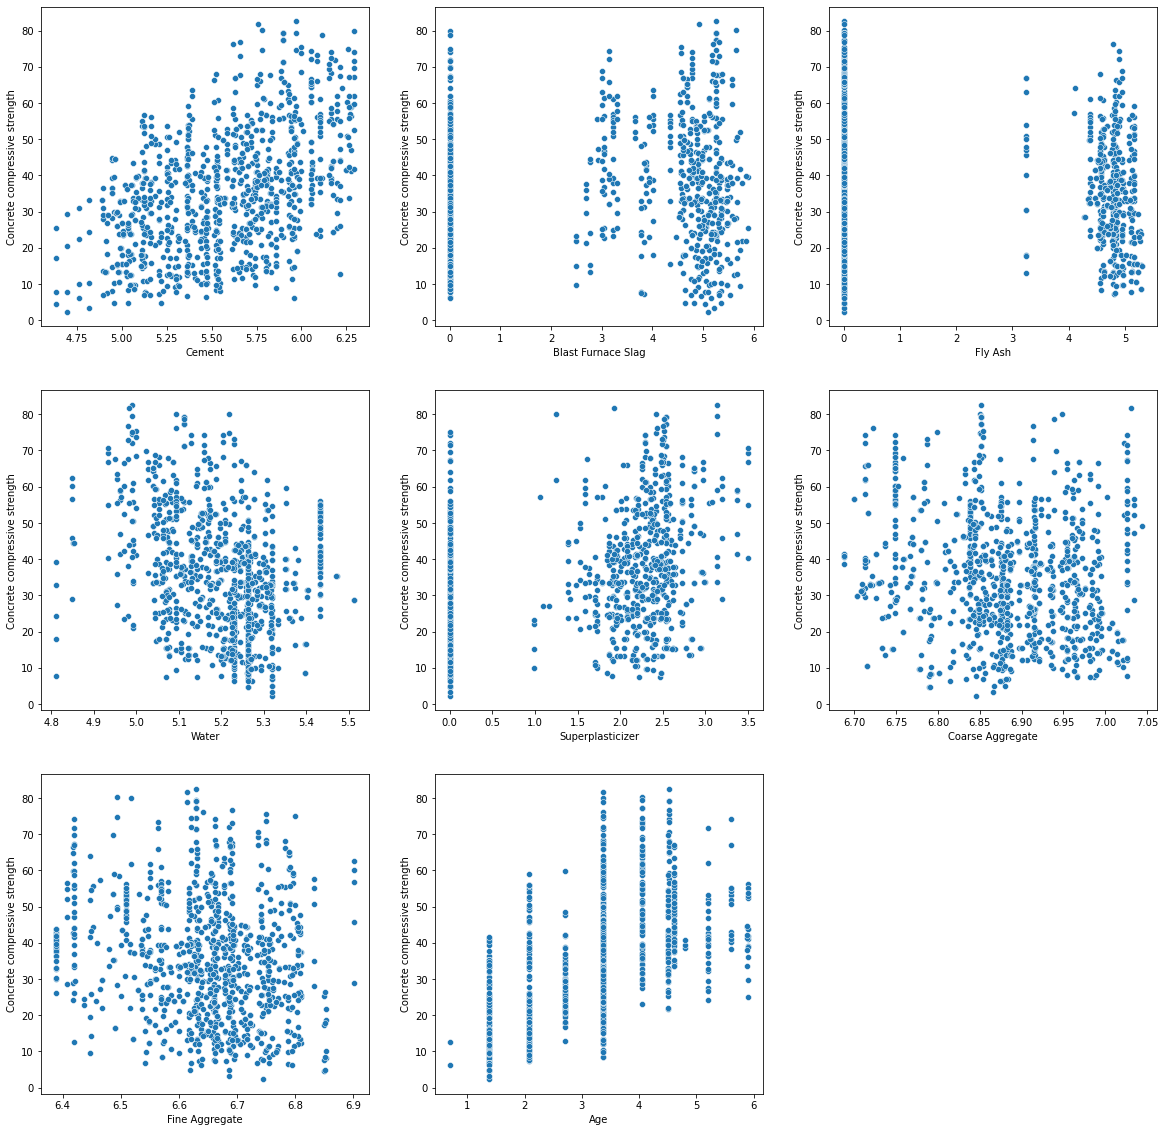

In [17]:
y=data["Concrete compressive strength"] 
plt.figure(figsize=(20,20),facecolor='white') 
plotnumber = 1

for column in data.columns[:8]: 
    a = plt.subplot(3,3,plotnumber) 
    sns.scatterplot(data[column],y) 
    plt.xlabel(column,fontsize=10) 
    plotnumber=plotnumber+1
plt.show()

# Correlation between the independent columns

<AxesSubplot:>

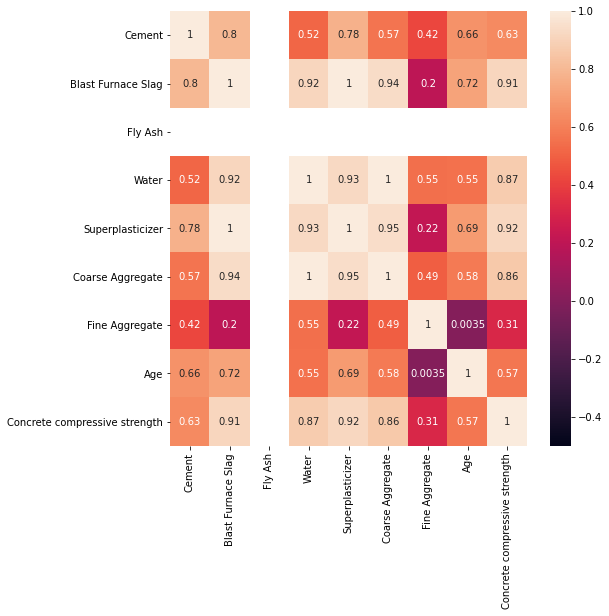

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(data[:8].corr().abs(), vmin = -0.5,vmax = 1,annot=True)

# Creating the Independent and Dependent Columns

In [19]:
x=pd.DataFrame(data,columns=data.columns[:8]) 
y=pd.DataFrame(data,columns=data.columns[8:])

# Splitting the data into train and split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(824, 8)
(824, 1)
(206, 8)
(206, 1)


# Traing and testing the model

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
mr=GradientBoostingRegressor() #object of GradientBoostingRegressor 
mr.fit(x_train,y_train)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

In [22]:
y_pred=mr.predict(x_test)
print("prediction made by Gradient Boosting model:",y_pred)

prediction made by Gradient Boosting model: [21.95234148 13.08162009 24.70391082 11.32025646 33.85349972 64.77465613
 18.45044902 48.72305133 40.43710467 20.12460115 38.64180627 14.73181983
 37.33435548 31.47690119  8.39548073 28.19448467 38.81451032 60.80235308
 55.41349105 36.17514766 22.09653922 50.34586419 17.54229031 59.22520866
 60.28299988 39.18419497 33.47870521 29.62105842 35.97574895 13.79206845
 42.2242261  54.78728341 27.06673021 24.87332946 34.92824549 39.36193638
 16.50942869 26.70669935 25.92994908 14.78114178 39.53782087 13.46243396
 47.04232237 38.96167764 35.78935294 27.67350801 33.28586165 27.08849056
 34.08139794 51.48267971 25.15450245 35.37386967 61.10296174 53.1944813
 56.51847802  8.85042266 38.02781274 22.95231442 32.99320901 44.64324648
 49.32434581 41.57929522 52.63226021 49.50361013 22.93940688 34.73179197
 48.47116198 35.05219693 40.66955402 27.65021804 29.83790459 27.00297825
 39.36193638 12.80090167 67.55248442 58.04726327 53.09303053 14.88848036
 60.3385

# Model Evaluation

In [23]:
score=mr.score(x_test,y_test)
print("score of Gradient Boosting model:",score)

score of Gradient Boosting model: 0.8857158399211074


In [24]:
from sklearn import metrics 
print("MAE:",metrics.mean_absolute_error(y_test,y_pred)) 
print("MSE:",metrics.mean_squared_error(y_test,y_pred)) 
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 

MAE: 3.8368952930359645
MSE: 29.793261086619847
RMSE: 5.45832035397519


# Dumping our model in pickle format

In [25]:
pickle.dump(mr, open('cement.pkl','wb'))

In [26]:
!pip install ibm_watson_machine_learning

In [27]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"Y5rmT3QmTz-Nt9TF3rtGQxfN_1lWe4Rw1J80wkOrjTpW"
                  }
client = APIClient(wml_credentials)

In [28]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)


Space UID = 3447e6aa-9823-4aa9-bd92-6abc5f9ec8e1


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [31]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [32]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [33]:
 model_details = client.repository.store_model(model=mr,meta_props={
 client.repository.ModelMetaNames.NAME:"Concrete_modeling",
 client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
 client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                              )
model_id = client.repository.get_model_uid(model_details)

In [35]:
model_id

'bbe308c4-f4c5-4ed3-ba1d-298d20a7bb9c'

In [36]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
612,5.627621,0.000000,0.000000,5.257495,0.000000,6.876265,6.753438,3.367296
525,5.886104,2.995732,4.955827,5.043425,2.476538,6.849066,6.687109,1.386294
597,5.612398,5.208940,0.000000,5.229503,0.000000,6.921066,6.572702,3.367296
846,5.905362,5.236442,0.000000,5.257495,2.079442,6.715383,6.630683,3.367296
259,5.364105,0.000000,4.619073,5.077671,2.433613,6.912544,6.807714,1.386294
...,...,...,...,...,...,...,...,...
960,5.652489,4.793308,0.000000,5.131672,2.104134,6.878738,6.678594,3.367296
847,5.638355,4.867534,4.615121,5.153292,2.302585,6.716595,6.692084,3.367296
715,4.957938,5.361292,0.000000,5.320568,0.000000,6.880179,6.619406,4.510860
905,4.912655,0.000000,5.117994,5.198497,2.397895,6.869014,6.692084,3.367296


In [38]:
mr.predict(x_test)

array([21.95234148, 13.08162009, 24.70391082, 11.32025646, 33.85349972,
       64.77465613, 18.45044902, 48.72305133, 40.43710467, 20.12460115,
       38.64180627, 14.73181983, 37.33435548, 31.47690119,  8.39548073,
       28.19448467, 38.81451032, 60.80235308, 55.41349105, 36.17514766,
       22.09653922, 50.34586419, 17.54229031, 59.22520866, 60.28299988,
       39.18419497, 33.47870521, 29.62105842, 35.97574895, 13.79206845,
       42.2242261 , 54.78728341, 27.06673021, 24.87332946, 34.92824549,
       39.36193638, 16.50942869, 26.70669935, 25.92994908, 14.78114178,
       39.53782087, 13.46243396, 47.04232237, 38.96167764, 35.78935294,
       27.67350801, 33.28586165, 27.08849056, 34.08139794, 51.48267971,
       25.15450245, 35.37386967, 61.10296174, 53.1944813 , 56.51847802,
        8.85042266, 38.02781274, 22.95231442, 32.99320901, 44.64324648,
       49.32434581, 41.57929522, 52.63226021, 49.50361013, 22.93940688,
       34.73179197, 48.47116198, 35.05219693, 40.66955402, 27.65